In [1]:
!apt update && apt install libgl1-mesa-glx -y
!pip install opencv-python

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [101 kB]      
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:5 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [1299 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [355 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [979 kB]33m
Get:8 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [32.0 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [328 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [879 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [729 kB]
Fetched 4929 kB in 1s (4227 kB/s)                 
Reading package lists... Done
Building dependency

In [2]:
import tensorflow as tf
import numpy as np
import requests

class VGG19(tf.keras.Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(tf.keras.layers.Flatten())
        self.add(tf.keras.layers.Dense(4096, activation= 'relu'))
        self.add(tf.keras.layers.Dropout(0.5))
        self.add(tf.keras.layers.Dense(4096, activation= 'relu'))
        self.add(tf.keras.layers.Dropout(0.5))
        self.add(tf.keras.layers.Dense(1000, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.03),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model = VGG19((224, 224, 3))

url = "https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels.h5"
r = requests.get(url, allow_redirects=True)
open('vgg19_weights_tf_dim_ordering_tf_kernels.h5', 'wb').write(r.content)

# Loads the weights
model.load_weights("vgg19_weights_tf_dim_ordering_tf_kernels.h5")

In [11]:
import requests
import cv2
import matplotlib.pyplot as plt

def download(images):
    for i in range(len(images)):
        r = requests.get(images[i], allow_redirects=True)
        open('test_image_'+ str(i) +'.jpg', 'wb').write(r.content)

def test(image_path):
    test_image = cv2.imread(image_path)
    test_image = cv2.resize(test_image, (224, 224))

    plt.figure()
    plt.imshow(test_image)

    test_image = test_image[np.newaxis, :]
    test_image = tf.cast(test_image, tf.float32)
    print(test_image.shape)
    predicted_value = model.predict_classes(test_image)
    plt.axis('off')
    plt.title(predicted_value[0])
    %timeit model.predict_classes(test_image)

In [4]:
images = ["https://images.unsplash.com/photo-1546768292-fb12f6c92568?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80",
          "https://images.unsplash.com/photo-1555041469-a586c61ea9bc?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80"]

In [5]:
download(images)

(1, 224, 224, 3)


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


92 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


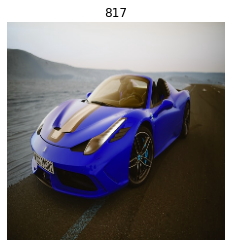

In [12]:
test("test_image_0.jpg")

In [7]:
model.save('./saved_model')


INFO:tensorflow:Assets written to: ./saved_model/assets


In [13]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
import numpy as np
import random

def optimize_model( ):
    converter_32 = trt.TrtGraphConverterV2(input_saved_model_dir='./saved_model',
                                        conversion_params = tf.experimental.tensorrt.ConversionParams(
                                            precision_mode='FP32',
                                        )
                                       )
    converter_16 = trt.TrtGraphConverterV2(input_saved_model_dir='./saved_model',
                                        conversion_params = tf.experimental.tensorrt.ConversionParams(
                                            precision_mode='FP16',
                                        )
                                       )
    converter_8 = trt.TrtGraphConverterV2(input_saved_model_dir='./saved_model',
                                        conversion_params = tf.experimental.tensorrt.ConversionParams(
                                            precision_mode='INT8',
                                        )
                                       )


    def my_input_fn():
        gen = np.random.normal(size=(1, 224, 224, 3)).astype(np.float32)
        yield (gen,)
        

    def int8_calibration_fn():
        test_image = cv2.imread("test_image_0.jpg")
        test_image = cv2.resize(test_image, (224, 224))
        test_image = test_image[np.newaxis, :]
        test_image = tf.cast(test_image, tf.float32)
        
        # Input for a single inference call, for a network that has two input tensors:
        yield (test_image,)


    converter_32.convert()
    converter_32.build(my_input_fn)
    converter_32.save('./optimized_32')
    
    converter_16.convert()
    converter_16.build(my_input_fn)
    converter_16.save('./optimized_16')
    
    converter_8.convert(int8_calibration_fn)
    converter_8.build(my_input_fn)
    converter_8.save('./optimized_8')

optimize_model()

INFO:tensorflow:Linked TensorRT version: (7, 2, 2)
INFO:tensorflow:Loaded TensorRT version: (7, 2, 3)
INFO:tensorflow:Loaded TensorRT 7.2.3 and linked TensorFlow against TensorRT 7.2.2. This is supported because TensorRT  minor/patch upgrades are backward compatible
INFO:tensorflow:Linked TensorRT version: (7, 2, 2)
INFO:tensorflow:Loaded TensorRT version: (7, 2, 3)
INFO:tensorflow:Loaded TensorRT 7.2.3 and linked TensorFlow against TensorRT 7.2.2. This is supported because TensorRT  minor/patch upgrades are backward compatible
INFO:tensorflow:Linked TensorRT version: (7, 2, 2)
INFO:tensorflow:Loaded TensorRT version: (7, 2, 3)
INFO:tensorflow:Loaded TensorRT 7.2.3 and linked TensorFlow against TensorRT 7.2.2. This is supported because TensorRT  minor/patch upgrades are backward compatible
INFO:tensorflow:Assets written to: ./optimized_32/assets
INFO:tensorflow:Assets written to: ./optimized_16/assets
INFO:tensorflow:Assets written to: ./optimized_8/assets


In [14]:
from tensorflow.python.saved_model import signature_constants
from tensorflow.python.saved_model import tag_constants
from tensorflow.python.framework import convert_to_constants
import tensorflow as tf
import cv2
import numpy as np

def get_func_from_saved_model(saved_model_dir):
  saved_model_loaded = tf.saved_model.load(
      saved_model_dir, tags=[tag_constants.SERVING])
  graph_func = saved_model_loaded.signatures[
      signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY]
  graph_func = convert_to_constants.convert_variables_to_constants_v2(graph_func)
  return graph_func

model_func_32 = get_func_from_saved_model('./optimized_32')
model_func_16 = get_func_from_saved_model('./optimized_16')
model_func_8 = get_func_from_saved_model('./optimized_8')

In [15]:
test_image = cv2.imread("test_image_0.jpg")
test_image = cv2.resize(test_image, (224, 224))
test_image = test_image[np.newaxis, :]
test_image = tf.cast(test_image, tf.float32)
data = tf.convert_to_tensor(test_image)

def evaluate_model(fn, image):
    print(np.argmax(fn(image), axis=-1)[0])
    %timeit model_func(image)

evaluate_model(model_func_32, data)
evaluate_model(model_func_16, data)
evaluate_model(model_func_8, data)

[817]
27.9 ms ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[817]
28 ms ± 61.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[817]
28.1 ms ± 72.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
!apt update && apt install libgl1-mesa-glx -y
!pip install opencv-python numba

In [ ]:
import cv2
import requests
import matplotlib.pyplot as plt

r = requests.get('https://static01.nyt.com/images/2019/04/02/science/28SCI-ZIMMER1/28SCI-ZIMMER1-articleLarge.jpg?quality=75&auto=webp&disable=upscale', allow_redirects=True)
open('frog.jpg', 'wb').write(r.content)

test_image = cv2.imread('frog.jpg')

plt.figure()
plt.imshow(test_image)

In [ ]:
threadsperblock = 32
xblocks = (test_image.shape[1] + (threadsperblock - 1)) // threadsperblock
yblocks = (test_image.shape[0] + (threadsperblock - 1)) // threadsperblock

print("Xblocks: ", xblocks)
print("Yblocks: ", yblocks)

In [ ]:
from numba import cuda

@cuda.jit
def cv_histogram(image, grayscale_image, kernel_size):
    y,x = cuda.grid(2)
    
    half = kernel_size // 2
    
    if x < image.shape[0] and y < image.shape[1]:
        sum_r = 0
        sum_g = 0
        sum_b = 0
        count = 0
        for i in range(x-half, x+half):
            for j in range(y-half, y+half):
                if i >= 0 and j >= 0:
                    sum_r += image[i,j,0]
                    sum_g += image[i,j,1]
                    sum_b += image[i,j,2]
                    count += 1
        
        grayscale_image[x,y,0] = (sum_r/count)
        grayscale_image[x,y,1] = (sum_g/count)
        grayscale_image[x,y,2] = (sum_b/count)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gray_img = np.zeros(shape=(test_image.shape[0], test_image.shape[1], 3), dtype=np.uint8)
# test_image = test_image.astype(np.uint32)

blocks_per_grid = (xblocks, yblocks)

cv_histogram[blocks_per_grid, (threadsperblock, threadsperblock)](test_image, gray_img, 20)

plt.figure()
plt.imshow(gray_img)